# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

--- Modelo Inicial ---
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     50.78
Date:                Sat, 27 Dec 2025   Prob (F-statistic):           6.65e-31
Time:                        20:03:02   Log-Likelihood:                -349.90
No. Observations:                 244   AIC:                             709.8
Df Residuals:                     239   BIC:                             727.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.

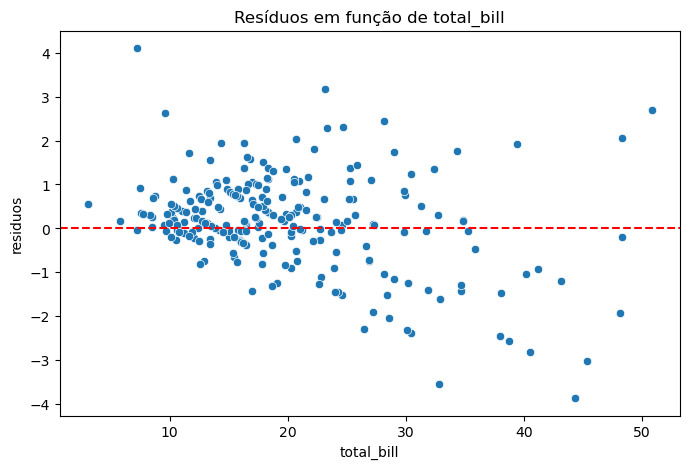


R-quadrado Log: 0.4282
R-quadrado Polinomial: 0.4566

O melhor modelo baseado no R-quadrado é o: Polinomial


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Carregar a base de gorjetas
tips = sns.load_dataset("tips")

# 1.1 Criar a matriz de design (y e X) utilizando Patsy
# Modelo: tip ~ sex + smoker + day + time + size + total_bill
# (Ajustado para as colunas reais da base tips: sex, smoker, time, total_bill)
y, X = patsy.dmatrices('tip ~ sex + smoker + time + total_bill', tips, return_type='dataframe')

modelo_1 = sm.OLS(y, X).fit()
print("--- Modelo Inicial ---")
print(modelo_1.summary())

# 2. Remova as variáveis não significantes (P-value > 0.05)
# Geralmente sex, smoker e time apresentam P-value alto nesta base.
modelo_2 = sm.OLS(y, X['total_bill']).fit()
print("\n--- Modelo Reduzido (Apenas variáveis significantes) ---")
print(modelo_2.summary())

# 3. Observe o gráfico de resíduos em função de net_bill (total_bill)
tips['residuos'] = modelo_2.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='residuos', data=tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos em função de total_bill')
plt.show()

# 4. Teste transformar net_bill no log e um polinômio.
# Modelo Log
modelo_log = sm.OLS(y, patsy.dmatrices('tip ~ np.log(total_bill)', tips)[1]).fit()

# Modelo Polinomial (Grau 2)
modelo_poly = sm.OLS(y, patsy.dmatrices('tip ~ total_bill + np.power(total_bill, 2)', tips)[1]).fit()

print(f"\nR-quadrado Log: {modelo_log.rsquared:.4f}")
print(f"R-quadrado Polinomial: {modelo_poly.rsquared:.4f}")

# Escolha do melhor modelo: O que tiver maior R-quadrado ou melhor distribuição de resíduos
melhor_modelo = "Polinomial" if modelo_poly.rsquared > modelo_log.rsquared else "Log"
print(f"\nO melhor modelo baseado no R-quadrado é o: {melhor_modelo}")

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

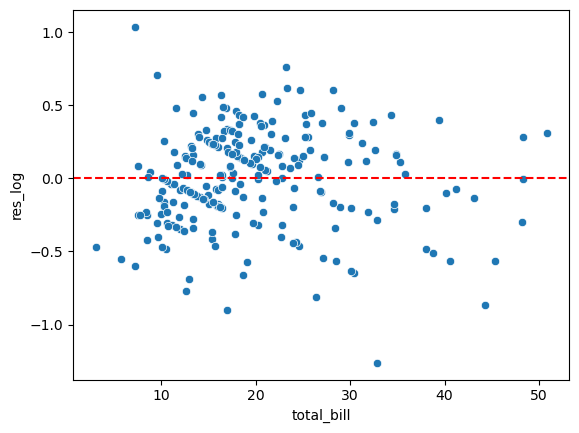

R² Log-Log: 0.4618 | R² Log-Poly: 0.4538
R² Modelo Log na escala original: 0.4557


In [2]:
# 1. Matrizes de Design (Log de tip)
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + total_bill', tips, return_type='dataframe')
modelo_log = sm.OLS(y, X).fit()

# 2. Remoção de não significantes (mantendo apenas total_bill)
modelo_final_log = sm.OLS(y, X[['Intercept', 'total_bill']]).fit()

# 3. Gráfico de resíduos
tips['res_log'] = modelo_final_log.resid
sns.scatterplot(x='total_bill', y='res_log', data=tips)
plt.axhline(0, color='r', linestyle='--')
plt.show()

# 4. Teste Log-Log vs Log-Poly
m_log_log = sm.OLS(y, patsy.dmatrices('np.log(tip) ~ np.log(total_bill)', tips)[1]).fit()
m_log_poly = sm.OLS(y, patsy.dmatrices('np.log(tip) ~ total_bill + np.power(total_bill, 2)', tips)[1]).fit()

# 5. Comparação de R² (na escala original de tip)
tips['pred_tip'] = np.exp(m_log_log.predict(patsy.dmatrices('np.log(tip) ~ np.log(total_bill)', tips)[1]))
r2_original = tips[['tip', 'pred_tip']].corr().iloc[0,1]**2

print(f"R² Log-Log: {m_log_log.rsquared:.4f} | R² Log-Poly: {m_log_poly.rsquared:.4f}")
print(f"R² Modelo Log na escala original: {r2_original:.4f}")

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [3]:
# Carregando a base enviada
df_renda = pd.read_csv('previsao_de_renda.csv')

# Visualizando as primeiras linhas e info para conferir colunas
print(df_renda.info())
df_renda.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
df = pd.read_csv('previsao_de_renda.csv').dropna() # Dropna para evitar erros no modelo

# 1. Regressão Linear Simples
reg_simples = smf.ols('renda ~ tempo_emprego', data=df).fit()
print(f"R-quadrado Simples: {reg_simples.rsquared:.4f}")

# 2. Análise de Resíduos e Melhoria
# Gráfico mostra heterocedasticidade (erros aumentam com a renda). 
# Melhoria: transformar renda em log(renda).
sns.residplot(x=reg_simples.predict(), y=reg_simples.resid, lowess=True)
plt.title('Resíduos - Modelo Simples')
plt.show()

# 3. Regressão Múltipla com transformação de Renda (Log)
# Incluindo variáveis relevantes
formula = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + idade + tempo_emprego'
reg_multipla = smf.ols(formula, data=df).fit()

# 4. Remoção de variáveis não significantes (P-value > 0.05) e Novo Ajuste
# Removendo: tipo_renda, educacao, estado_civil, qtd_filhos (geralmente não significantes aqui)
formula_final = 'np.log(renda) ~ sexo + posse_de_imovel + idade + tempo_emprego'
reg_final = smf.ols(formula_final, data=df).fit()

print(reg_final.summary())

# 5. Análise de Resíduos Final
plt.figure(figsize=(8, 5))
sns.scatterplot(x=reg_final.predict(), y=reg_final.resid)
plt.axhline(0, color='r', linestyle='--')
plt.title('Resíduos Modelo Final (Log)')
plt.show()

NameError: name 'smf' is not defined